In [117]:
import numpy as np
import numpy.ma as ma
import matplotlib.pyplot as plt
import xarray as xr
import pickle
import time
import datetime
from salishsea_tools import viz_tools
from salishsea_tools import geo_tools
%matplotlib inline
#%matplotlib qt

In [97]:
grid = xr.open_dataset("https://salishsea.eos.ubc.ca/erddap/griddap/ubcSSnBathymetryV17-02").sel(gridX = slice(10, 364), gridY = slice(200, 739))

In [98]:
nemo_mask =xr.open_dataset("https://salishsea.eos.ubc.ca/erddap/griddap/ubcSSn2DMeshMaskV17-02").tmaskutil.sel(gridX = slice(10, 364), gridY = slice(200, 739)) 

In [99]:
lat = grid.latitude
lon = grid.longitude

/home/abhudia/anaconda3/lib/python3.7/site-packages/matplotlib/contour.py:1243: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"
/home/abhudia/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:1334: MatplotlibDeprecationWarning: 
box-forced
  "2.2", "box-forced", obj_type="keyword argument")


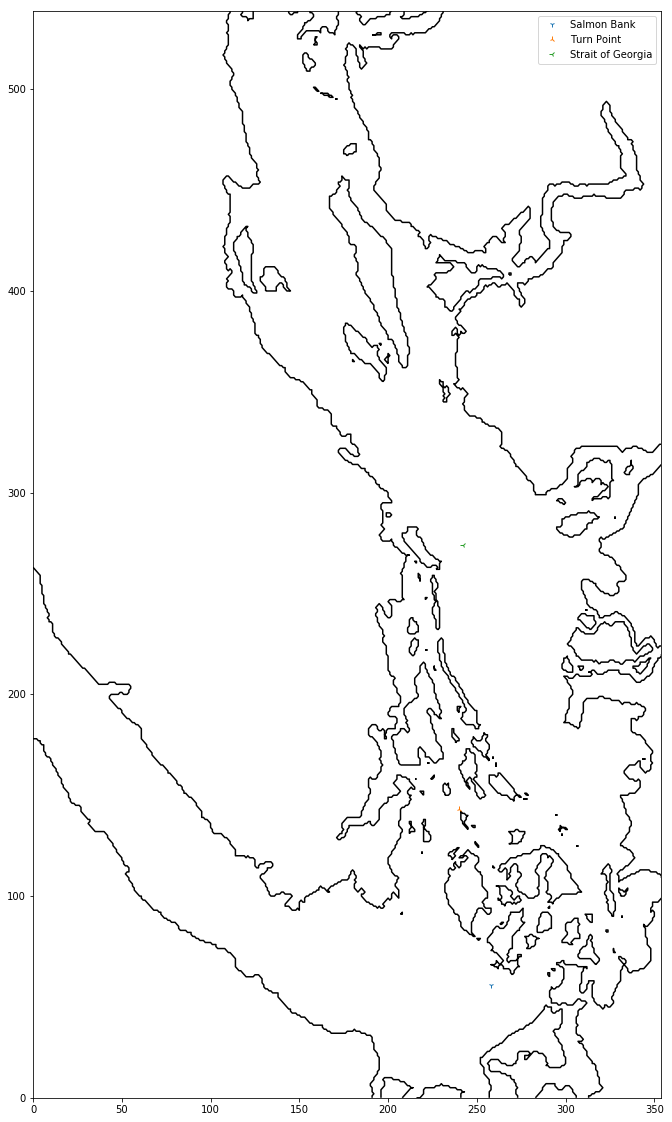

In [100]:
fig = plt.figure(figsize = (20,20))
ax = plt.subplot(111)
ax.contour(nemo_mask.isel(time=0).values, levels=[-1,1], colors= "k")
viz_tools.set_aspect(ax)
ax.plot([258],[56],"1", label="Salmon Bank")
ax.plot([240], [143], "2", label = 'Turn Point')
ax.plot([242], [274], "3", label = 'Strait of Georgia')
ax.legend()

In [101]:
mask_array = nemo_mask.isel(time=0).values

In [102]:
salmon_lat = lat.values[56][258]
turn_lat = lat.values[138][237]
sog_lat = lat.values[274][242]
salmon_lon = lon.values[56][258]
turn_lon = lon.values[138][237]
sog_lon = lon.values[274][242]

In [103]:
salmon_coords = (salmon_lat, salmon_lon)
turn_coords = (turn_lat, turn_lon)
sog_coords = (sog_lat, sog_lon)

In [104]:
print(salmon_coords)

(48.38138198852539, -122.85613250732422)


In [105]:
print(turn_coords)

(48.66575622558594, -123.23974609375)


In [106]:
print(sog_coords)

(49.21060562133789, -123.66905975341797)


In [107]:
HRDPS = xr.open_dataset("https://salishsea.eos.ubc.ca/erddap/griddap/ubcSSaAtmosphereGridV1")

In [108]:
HRDPS_lon = HRDPS.longitude.values - 360

In [109]:
HRDPS_lat = HRDPS.latitude.values

In [136]:
## Finding Salmon Bank
distances = np.zeros([266,256])
for i in range(266):
    for j in range(256):
        distances[i][j] = geo_tools.haversine(salmon_coords[1], salmon_coords[0], HRDPS_lon[i][j], HRDPS_lat[i][j])
HDsalmon = np.unravel_index(np.argmin(distances), distances.shape)
print("Salmon bank is off by {} km".format(np.min(distances)))
## Finding Turn Point
distances = np.zeros([266,256])
for i in range(266):
    for j in range(256):
        distances[i][j] = geo_tools.haversine(turn_coords[1], turn_coords[0], HRDPS_lon[i][j], HRDPS_lat[i][j])
HDturn = np.unravel_index(np.argmin(distances), distances.shape)
print("Turn point is off by {} km".format(np.min(distances)))
## Finding SoG
distances = np.zeros([266,256])
for i in range(266):
    for j in range(256):
        distances[i][j] = geo_tools.haversine(sog_coords[1], sog_coords[0], HRDPS_lon[i][j], HRDPS_lat[i][j])
HDsog = np.unravel_index(np.argmin(distances), distances.shape)
print("Strait of Georgia is off by {} km".format(np.min(distances)))

Salmon bank is off by 1.1329073367672617 km
Turn point is off by 0.8714354300075183 km
Strait of Georgia is off by 0.9080124895734909 km


In [134]:
print(HDsalmon)
print(HDturn)
print(HDsog)

(99, 159)
(115, 149)
(143, 141)


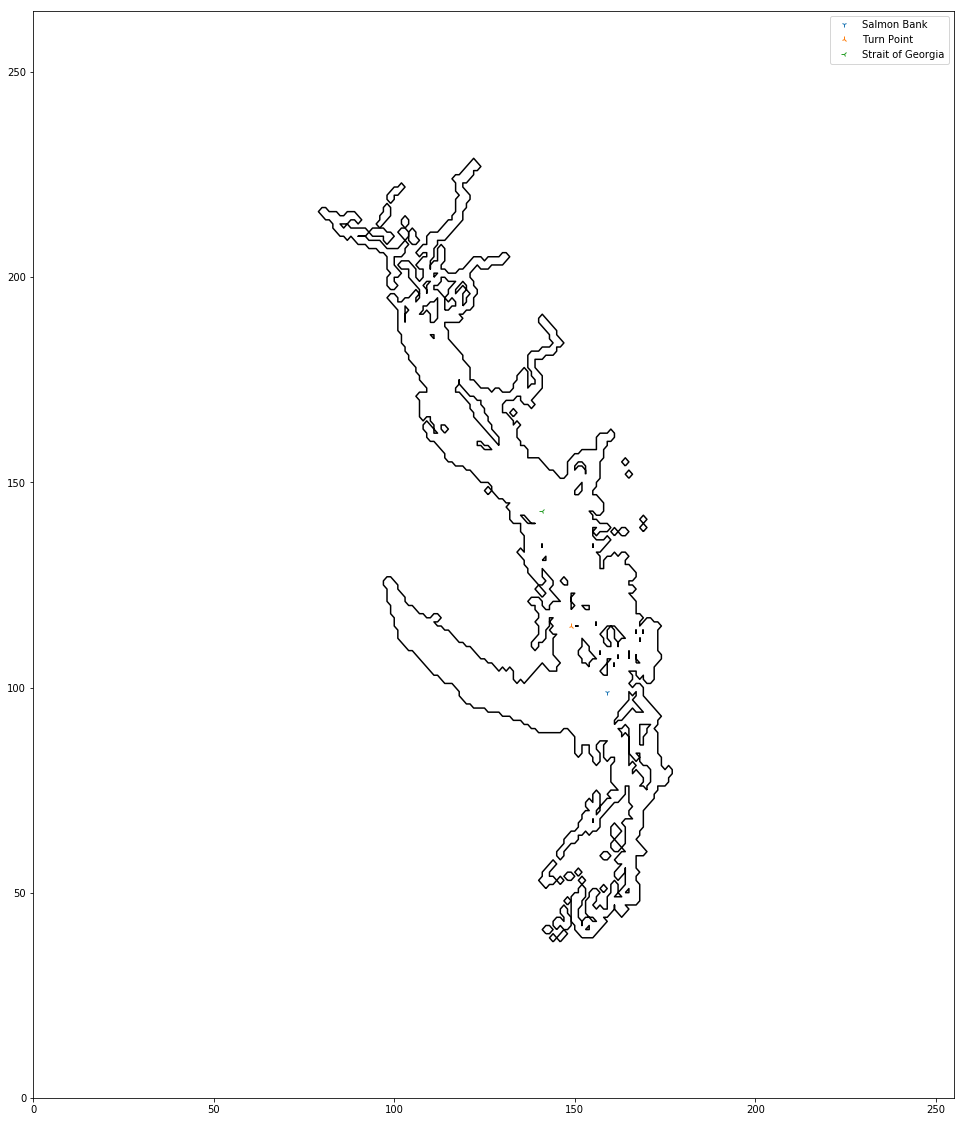

In [135]:
fig = plt.figure(figsize = (20,20))
ax = plt.subplot(111)
ax.contour(land_mask, levels=[-1,1], colors= "k")
ax.plot([HDsalmon[1]],[HDsalmon[0]],"1", label="Salmon Bank")
ax.plot([HDturn[1]], [HDturn[0]], "2", label = 'Turn Point')
ax.plot([HDsog[1]], [HDsog[0]], "3", label = 'Strait of Georgia')
viz_tools.set_aspect(ax)
ax.legend()